In [2]:
import numpy as np
import matplotlib.pyplot as plt



In [3]:
def F_g(pos_list): #2nx1 list, for n particles (each has an x and y component)
    """
    second time derivative of the position vector.
    """
    a = np.zeros(len(pos_list)) #acceleration list
    
    for i in range(len(a)//2):
        for j in range(i+1, len(a)//2): #make sure j>i to prevent overcounting
            pos_1 = [pos_list[2*i], pos_list[2*i+1]]
            pos_2 = [pos_list[2*j], pos_list[2*j+1]]
            x = pos_2[0] - pos_1[0]
            y = pos_2[1] - pos_1[1]
            c1 = (48*x*((x**2+y**2)**(-7))) - (24*x*((x**2+y**2)**(-4)))
            c2 = (48*y*((x**2+y**2)**(-7))) - (24*y*((x**2+y**2)**(-4)))
            a[2*i] += -c1
            a[2*i+1] += -c2
            a[2*j] += c1
            a[2*j+1] += c2
    return a 

In [4]:
def PE(p):#gets potential energy of the system, given the position list p
    pe = 0
    for i in range(len(p)//2):
        for j in range(i+1, len(p)//2): #make sure j>i to prevent overcounting
            r = np.sqrt((p[2*j]-p[2*i])**2 + (p[2*j+1]-p[2*i+1])**2) #displacement between pair 
            pe+=4*((1/r)**12 - (1/r)**6)
    return pe

In [5]:
PE([0,0,4,3])

-0.0002559836160000001

In [6]:
def KE(v):#get kinetic energy of system, given the velocity list v (assume m=1 for all particles):
    ke = 0
    for i in range(len(v)):
        ke+= (v[i]**2)/2
    return ke

In [7]:
KE([1,2,1,2])

5.0

In [8]:
def xy_coord_3(pos_list):
    """
    returns trajectory of each particle
    """
    h = 0.01
    r = pos_list
    r_list = [] #trajectory list
    v = 0.5*h*F_g(r) #v(t+h/2), t=0 here
    E_list = [PE(r)] #energy list, with initial energy (just potential since v=0 for all particles)
    for i in range(1000):
        r_list.append(list(r))
        r+=h*v #get r(t+h)
        k = h*F_g(r)
        v_mid = v+k/2 #get v(t+h)
        v+=k #get v(t+3h/2)
        E = PE(r) + KE(v_mid)
        E_list.append(E)
    return [np.array(r_list), E_list]

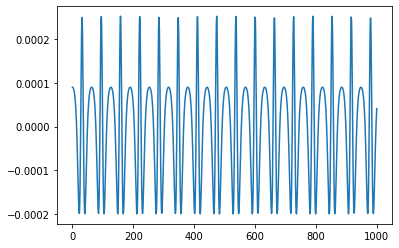

In [9]:
s1 =  [4,4,5.2,4]
result = xy_coord_3(s1)
E = result[1]
plt.plot(E-np.average(E))

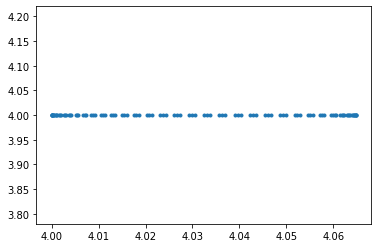

In [10]:
plt.plot(result[0][:100,0],result[0][:100,1],'.')

# Square grid, getting energy

In [11]:
#making the square grid:

N = 16
Lx = 4.0
Ly = 4.0
dx = Lx/np.sqrt(N)
dy = Ly/np.sqrt(N)
x_grid = np.arange(dx/2, Lx, dx)
y_grid =  np.arange(dy/2, Ly, dy)
xx_grid, yy_grid = np.meshgrid(x_grid, y_grid)
x_initial = xx_grid.flatten()
y_initial = yy_grid.flatten()

In [12]:
x_initial

array([0.5, 1.5, 2.5, 3.5, 0.5, 1.5, 2.5, 3.5, 0.5, 1.5, 2.5, 3.5, 0.5,
       1.5, 2.5, 3.5])

In [13]:
y_initial

array([0.5, 0.5, 0.5, 0.5, 1.5, 1.5, 1.5, 1.5, 2.5, 2.5, 2.5, 2.5, 3.5,
       3.5, 3.5, 3.5])

In [14]:
r_initial = np.zeros(len(x_initial)*2)
for i in range(len(x_initial)):
    r_initial[2*i] = x_initial[i]
    r_initial[2*i+1] = y_initial[i]

In [15]:
r_initial

array([0.5, 0.5, 1.5, 0.5, 2.5, 0.5, 3.5, 0.5, 0.5, 1.5, 1.5, 1.5, 2.5,
       1.5, 3.5, 1.5, 0.5, 2.5, 1.5, 2.5, 2.5, 2.5, 3.5, 2.5, 0.5, 3.5,
       1.5, 3.5, 2.5, 3.5, 3.5, 3.5])

In [16]:
traj = xy_coord_3(r_initial)

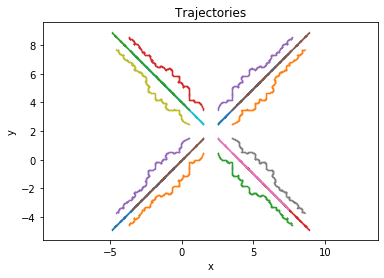

In [17]:
for i in range(len(x_initial)):
    plt.plot(traj[0][:,2*i],traj[0][:,2*i+1], ".", markersize=.5)
    plt.axis("equal")
plt.title("Trajectories")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("Q3a_traj.pdf")

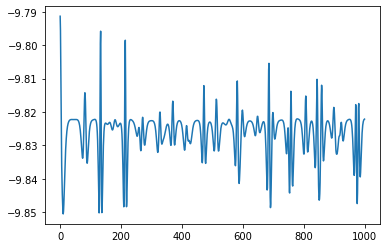

In [263]:
plt.plot(traj[1]) #wthin 1%, nice

# Periodic conditions

In [335]:
def F_gp(pos_list,Lx,Ly): #getting forces for periodic boundary conditions [0,Lx]x[0,Ly]
    """
    second time derivative of the position vector.
    """
    
    #make difference x, y arrays to easily change the x and y coordinates by Lx,Ly
    Dx, Dy = np.zeros(len(pos_list)), np.zeros(len(pos_list))
    Dx[::2] = Lx
    Dy[1::2] = Ly
    
    #make the periodic boundary position list:
    per_pos = pos_list #real particles
    #image particles:
    per_pos = np.append(per_pos, pos_list-Dx-Dy) #bottom left
    per_pos = np.append(per_pos, pos_list-Dx) #centre left
    per_pos = np.append(per_pos, pos_list-Dx+Dy) #top left
    per_pos = np.append(per_pos, pos_list-Dy) #bottom centre
    per_pos = np.append(per_pos, pos_list+Dy) #top centre
    per_pos = np.append(per_pos, pos_list+Dx-Dy) #bottom right
    per_pos = np.append(per_pos, pos_list+Dx) #centre right
    per_pos = np.append(per_pos, pos_list+Dx+Dy) #top right
    
    
    a = np.zeros(len(per_pos)) #acceleration list
    
    for i in range(len(a)//2):
        for j in range(i+1, len(a)//2): #make sure j>i to prevent overcounting
            pos_1 = [per_pos[2*i], per_pos[2*i+1]]
            pos_2 = [per_pos[2*j], per_pos[2*j+1]]
            x = pos_2[0] - pos_1[0]
            y = pos_2[1] - pos_1[1]
            c1 = (48*x*((x**2+y**2)**(-7))) - (24*x*((x**2+y**2)**(-4)))
            c2 = (48*y*((x**2+y**2)**(-7))) - (24*y*((x**2+y**2)**(-4)))
            a[2*i] += -c1
            a[2*i+1] += -c2
            a[2*j] += c1
            a[2*j+1] += c2
    return a[:len(pos_list)] #only return accelerations for the real particles, not images

In [350]:
def xy_coord_4(pos_list,Lx,Ly): #adjusted for periodic boundary conditions
    h = 0.01
    r = pos_list
    r_list = [] #trajectory list
    v = 0.5*h*F_gp(r,Lx,Ly) #v(t+h/2), t=0 here
    E_list = [PE(r)] #energy list, with initial energy (just potential since v=0 for all particles)
    for i in range(1000):
        r_list.append(list(r))
        r+=h*v #get r(t+h)
        k = h*F_gp(r,Lx,Ly)
        v_mid = v+k/2 #get v(t+h)
        v+=k #get v(t+3h/2)
        E = PE(r) + KE(v_mid)
        E_list.append(E)
        r[::2]=np.mod(r[::2], Lx) #bring x values back into [0,Lx] domain
        r[1::2]=np.mod(r[1::2], Ly) #bring y values back into [0,Ly] domain
    return [np.array(r_list), E_list]

In [351]:
r_initial = np.zeros(len(x_initial)*2)
for i in range(len(x_initial)):
    r_initial[2*i] = x_initial[i]
    r_initial[2*i+1] = y_initial[i]

In [352]:
traj = xy_coord_4(r_initial,Lx,Ly)

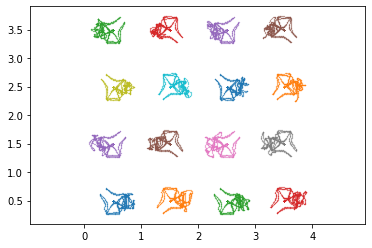

In [353]:
for i in range(len(x_initial)):
    plt.plot(traj[0][:,2*i],traj[0][:,2*i+1], ".", markersize=.5)
    plt.axis("equal")